In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soaicommunitydatathon23-stress-detection/sample.csv
/kaggle/input/soaicommunitydatathon23-stress-detection/train.csv
/kaggle/input/soaicommunitydatathon23-stress-detection/test.csv


In [63]:
import pandas as pd
import numpy as np
train_data = pd.read_csv("/kaggle/input/soaicommunitydatathon23-stress-detection/train.csv")
test_data = pd.read_csv("/kaggle/input/soaicommunitydatathon23-stress-detection/test.csv")
sample_data = pd.read_csv("/kaggle/input/soaicommunitydatathon23-stress-detection/sample.csv")

In [64]:
data = pd.concat([train_data, test_data])

In [65]:
print("shape of training data", train_data.shape)
print("shape of test data",test_data.shape)

shape of training data (1986, 117)
shape of test data (852, 116)


In [66]:
data.head(3)

,post_id,subreddit,post_id.1,sentence_range,text,id,label,confidence,social_timestamp,social_karma,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,2092,stress,8b9j8h,"(0, 5)","Hello, You are invited to complete a survey fo...",6319,0.0,1.0,1523381550,1,...,1.125,1.0000,1.0,1.70118,1.50569,1.86595,1.00,0,13.057706,-0.004167
1,1567,homeless,8cprrd,"(2, 7)","I want to know about your story, how you got t...",42996,0.0,0.8,1523903160,1,...,1.125,1.1429,1.0,1.63593,1.42195,1.90234,1.00,3,4.984540,0.300000
2,1550,ptsd,63nmo1,"(5, 10)",Have any of you requested accommodations throu...,34744,0.0,1.0,1491418808,7,...,1.400,1.2500,1.0,1.69333,1.34444,1.98548,0.89,10,5.223333,0.187500


In [50]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
train_data["text"] = train_data["text"].apply(clean)

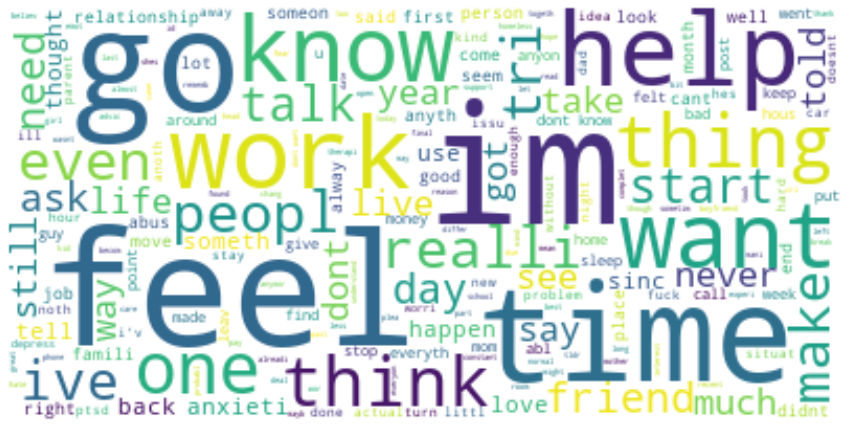

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
train_data["label"] = train_data["label"].map({0: "No Stress", 1: "Stress"})
train_data = train_data[["text", "label"]]
print(data.head())

                                                text      label
0  hello invit complet survey wmu psycholog depar...  No Stress
1  want know stori got struggl never realiz would...  No Stress
2  request accommod univers would will share what...  No Stress
3  whenev reaction meltdown alway tri give shitti...     Stress
4  throwaway embarrass issu although everyon know...     Stress


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(train_data["text"])
y = np.array(train_data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [75]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [81]:
predictions=model.predict(xtest)

In [83]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ytest, predictions)
print(score)

0.7160804020100503


In [90]:
print(sub_data.shape)
print(test_data.shape)
print(predictions.shape)

(852, 2)
(852, 116)
(398,)


In [97]:
sub_data  = pd.read_csv('../input/soaicommunitydatathon23-stress-detection/sample.csv')
sub_data= pd.Series([sub_data])


In [98]:
sub_data['label'] = predictions
sub_data['post_id'] = test_data['post_id']
sub_data.to_csv('finalSubmission.csv',index=False)